In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [45]:
df = pd.read_csv('Data/california_housing_train.csv')

In [46]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [47]:
lat_long = df[['latitude', 'longitude']]
lat, long = df.latitude, df.longitude

Plotting the Locations

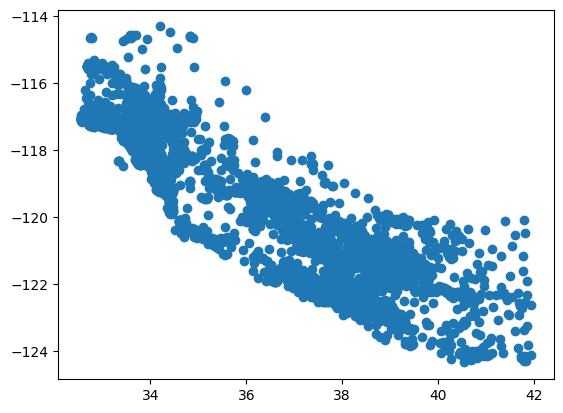

In [48]:
plt.scatter(lat, long)

Converting the location to Numpy Array

In [49]:
X = lat_long.to_numpy()

In [50]:
dbscan_model = DBSCAN(eps=0.2, min_samples=30).fit(X)

In [51]:
labels = dbscan_model.labels_

In [52]:
df['labels'] = labels
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  labels  
0      1015.0       472.0         1.4936             66900.0      -1  
1      1129.0       463.0         1.8200             80100.0      -1  
2       333.0       117.0         1.6509             85700.0      -1  
3       515.0       226.0         3.1917             73400.0      -1  
4       624.0       262.0         1.9250             65500.0      -1

In [53]:
df['labels'].value_counts()

labels
 2     8907
 8     5824
 4      705
-1      601
 3      231
 7      209
 1      118
 9       97
 10      95
 0       80
 5       77
 6       56
Name: count, dtype: int64

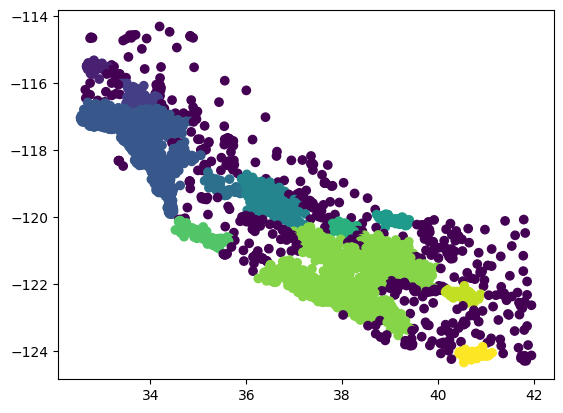

In [54]:
sc = plt.scatter(X[:, 0], X[:, 1], c=labels)

In [55]:
from sklearn.metrics import silhouette_score as ss
ss(X, df['labels'])

0.3613086766170458

In [56]:
epsilons = np.linspace(0.01, 1, num=15)

In [57]:
min_samples = np.arange(2, 20, step=3)

Finding the Best Combinations for Epsilon and Min Samples based on the Silhouette Score

In [58]:
import itertools

In [59]:
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [60]:
def get_scores_and_labels(combination, x):
    scores = []
    all_labels_list = []
    
    
    for i, (eps, num_samples) in enumerate(combination):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(x)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
            
            if (num_clusters < 2) or (num_clusters > 50):
                scores.append(-10)
                all_labels_list.append('bad')
                c = (eps, num_samples)
                print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
                continue
                
            scores.append(ss(x, labels))
            all_labels_list.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")
           
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]
            
    return {'best_epsilon': best_parameters[0],
                    'best_min_samples': best_parameters[1], 
                    'best_labels': best_labels,
                    'best_score': best_score}

best_dict = get_scores_and_labels(combinations, x)     
            

Combination (0.01, 2) on iteration 1 of 90 has 2170 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 945 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 394 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 179 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 75 clusters. Moving on
Index: 5, Score: -0.7351371201118361, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 36
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 130 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 70 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 54 clusters. Moving on
Index: 9, Score: 0.2241184716489065, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 50
Index: 10, Score: 0.23025110810727797, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 45
Index: 11, Score: 0.25576779449421544, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 40
Combination (0.15142857142857144, 2) o

BEST COMBINATION

In [61]:
best_dict

{'best_epsilon': 0.29285714285714287,
 'best_min_samples': 14,
 'best_labels': array([-1, -1, -1, ..., -1, -1,  4], dtype=int64),
 'best_score': 0.4066290757338104}

In [77]:
best_model = DBSCAN(eps=best_dict['best_epsilon'], min_samples=best_dict['best_min_samples']).fit(x)

In [63]:
best_labels = best_model.labels_

In [64]:
df['best_labels_lat_long'] = best_labels

In [65]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  labels  \
0      1015.0       472.0         1.4936             66900.0      -1   
1      1129.0       463.0         1.8200             80100.0      -1   
2       333.0       117.0         1.6509             85700.0      -1   
3       515.0       226.0         3.1917             73400.0      -1   
4       624.0       262.0         1.9250             65500.0      -1   

   best_labels  
0           -1  
1           -1  
2           -1  
3           -1  
4           -1

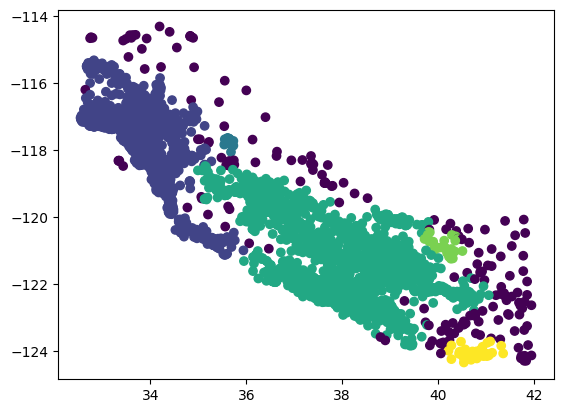

In [66]:
sc = plt.scatter(x[:, 0], x[:, 1], c=best_labels_lat_long)

In [67]:
import plotly.express as px

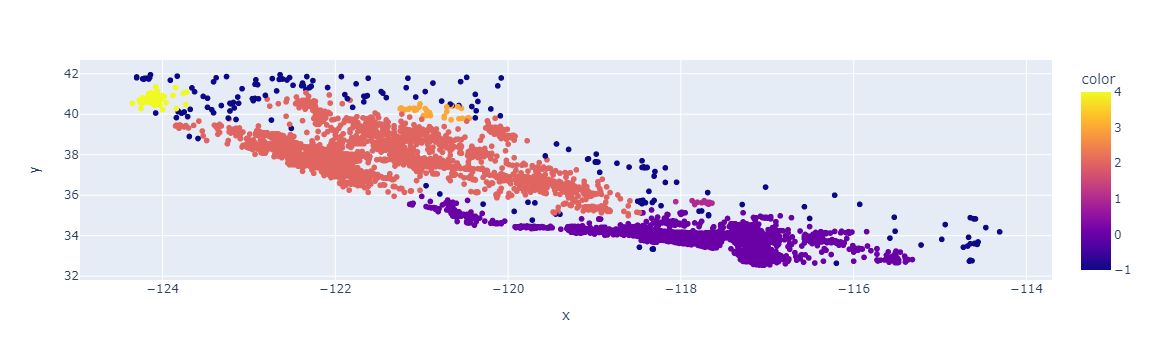

In [68]:
fig = px.scatter(x=long, y=lat, color=best_labels_lat_long)
fig.show()

TOTAL ROOMS vs MEDIAN AGE

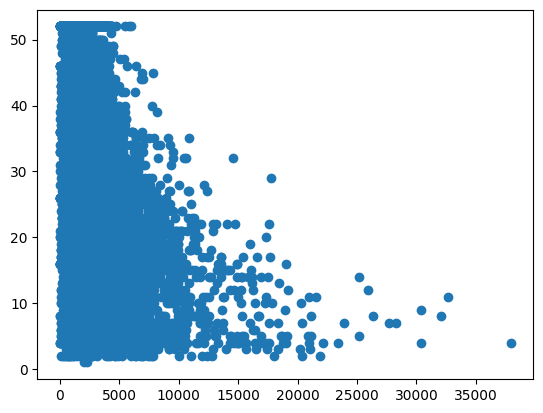

In [69]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [81]:
x2 = df[['total_rooms', 'housing_median_age']].to_numpy()

UNSCALED COMBINATONS

In [82]:
best_dict_2 = get_scores_and_labels(combinations,x2)

Combination (0.01, 2) on iteration 1 of 90 has 863 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 863 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 0 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 863 cl

In [83]:
best_dict_2

{'best_epsilon': 0.01,
 'best_min_samples': 2,
 'best_labels': 'bad',
 'best_score': -10}

NORMALIZING THE DATA

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
x2_scaled = StandardScaler().fit_transform(x2)

In [86]:
best_dict_2_scaled = get_scores_and_labels(combinations,x2_scaled)

Combination (0.01, 2) on iteration 1 of 90 has 1884 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 685 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 337 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 133 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 60 clusters. Moving on
Index: 5, Score: -0.5312324216453211, Labels: [-1 -1 -1 ... -1 -1 11], NumClusters: 32
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 99 clusters. Moving on
Index: 7, Score: -0.20384053173649058, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 34
Index: 8, Score: -0.1828630389511955, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 9, Score: -0.22366221116925375, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 10, Score: -0.23893089977584267, Labels: [ 0 -1  1 ...  1  1  1], NumClusters: 10
Index: 11, Score: -0.1439507321917493, Labels: [-1 -1  0 ...  0  0  0], NumClusters: 7
Index: 12, Score: 0.170115222274

In [87]:
best_dict_2_scaled

{'best_epsilon': 0.8585714285714285,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.8739122955987667}

In [92]:
df.best_labels_age_rooms.value_counts()

best_labels_age_rooms
 0    16995
 1        4
-1        1
Name: count, dtype: int64

In [88]:
best_model_2 = DBSCAN(eps=best_dict_2_scaled['best_epsilon'], min_samples=best_dict_2_scaled['best_min_samples']).fit(x2_scaled)

In [89]:
df['best_labels_age_rooms'] = best_model_2.labels_

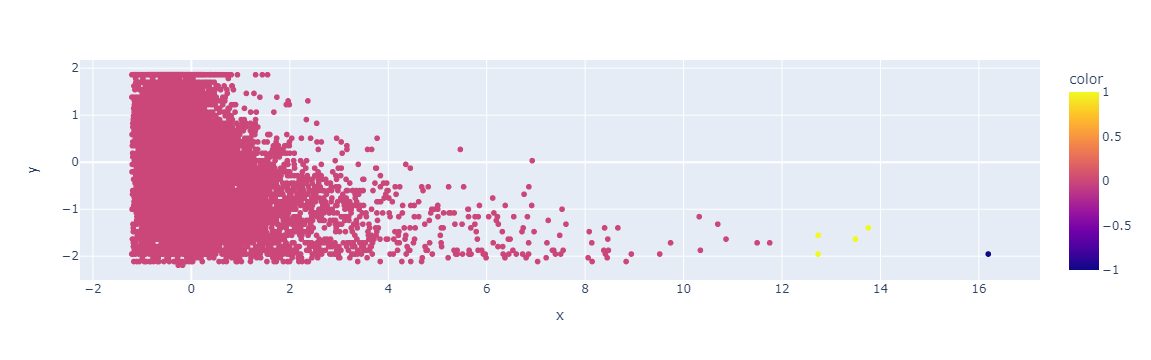

In [91]:
fig = px.scatter(x=x2_scaled[:,0], y=x2_scaled[:,1], color=df['best_labels_age_rooms'])
fig.show()